In [1]:
import pandas as pd
import numpy as np
from dataCleaning import *
from dataAnalysis import *
from parameterTuning import *
from parameterTuning import *
from regression_models import *
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

from sklearn.exceptions import DataConversionWarning
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
import warnings

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
2022-12-14 19:21:23.563829: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
column_names = {"id", "song", "artist", "duration_ms", "danceability", "energy", "key", "loudness", "mode", "loudness", "mode", "speechiness", "acousticness", 
                "instrumentalness", "liveness", "valence", "tempo", "popularity",  "popularity", "artist_followers", "number_of_artists", "number_of_markets"}
target_column = {"clusters_popularity", "popularity"}
popularity = {"popularity"}

string_columns = {"id", "song", "artist"}


df = pd.read_csv("datasets_kaggle/dataset_unido_anyadidos.csv", sep = ";")

In [3]:
df = preprocess(df, target_column)
df = df.drop(columns = string_columns)
df = create_clusters(df)

In [4]:
# Create the RFE model and select all features
model = DecisionTreeRegressor()
rfe = RFE(model,n_features_to_select= 9)

In [5]:
rfe.fit(df.drop(columns = target_column), df[popularity])

selected_columns = df.drop(columns = target_column).columns[rfe.support_]
y = df["clusters_popularity"]
x = df[selected_columns]

scaler = std_scaler(x)

In [6]:
print(y.head())
print(x.head())

0    Very unpopular
1           Popular
2           Average
3           Popular
4         Unpopular
Name: clusters_popularity, dtype: category
Categories (5, object): ['Very unpopular' < 'Unpopular' < 'Average' < 'Popular' < 'Very popular']
   duration_ms  danceability  loudness  acousticness  instrumentalness  \
0       204600         833.0    -8.795        0.0102          0.021900   
1       326933         743.0   -10.401      199.0000          0.006110   
2       185707         838.0    -7.148        0.0344          0.000234   
3       199413         494.0   -15.236      604.0000          0.510000   
4       392893         678.0   -11.648        0.1800        512.000000   

   liveness  valence  artist_followers  number_of_markets  
0  165.0000   286.00        12489395.0                1.0  
1  137.0000   588.00        10020401.0              183.0  
2  159.0000   173.00        12489395.0              183.0  
3    0.0922     0.23         1675703.0              183.0  
4  439.0000   

In [7]:
reduced_data = PCA(n_components=2).fit(scaler.transform(x))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn

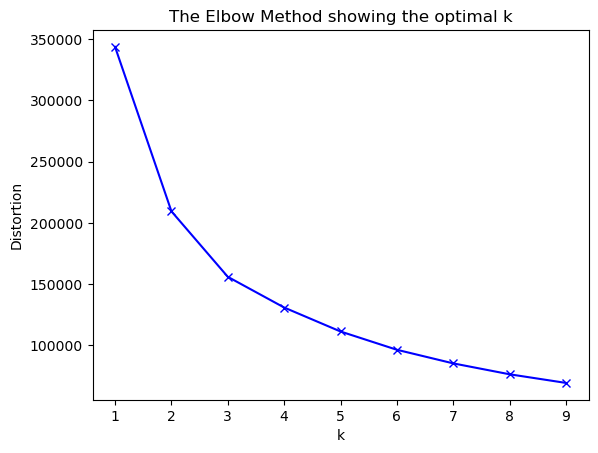

In [8]:
#elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(reduced_data.transform(scaler.transform(x)))
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [27]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(reduced_data.transform(scaler.transform(x)))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


KMeans(n_clusters=2)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn

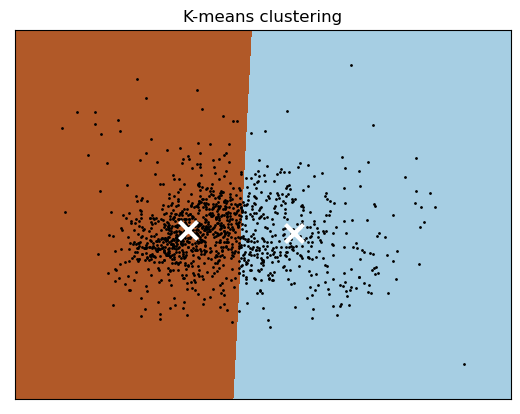

In [28]:
h = 0.02 

data_subset = x.sample(frac=0.01, random_state=3)

x_min, x_max = reduced_data.transform(scaler.transform(data_subset))[:, 0].min() - 1, reduced_data.transform(scaler.transform(data_subset))[:, 0].max() + 1
y_min, y_max = reduced_data.transform(scaler.transform(data_subset))[:, 1].min() - 1, reduced_data.transform(scaler.transform(data_subset))[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
              extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                cmap=plt.cm.Paired,
                aspect='auto', origin='lower')

plt.plot(reduced_data.transform(scaler.transform(data_subset))[:, 0], reduced_data.transform(scaler.transform(data_subset))[:, 1], 'k.', markersize=2)


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
plt.title('K-means clustering')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [29]:

print("Silhouette score: ", silhouette_score(reduced_data.transform(scaler.transform(x)), kmeans.labels_))
print("Calinski-Harabasz score: ", calinski_harabasz_score(reduced_data.transform(scaler.transform(x)), kmeans.labels_))
print("Davies-Bouldin score: ", davies_bouldin_score(reduced_data.transform(scaler.transform(x)), kmeans.labels_))



/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Silhouette score:  0.41374893875284174
Calinski-Harabasz score:  77991.21408083125
Davies-Bouldin score:  1.0009250287988969


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [11]:
# Importar la librería de machine learning de scikit-learn
from sklearn.cluster import DBSCAN

# Seleccionar un subconjunto aleatorio del 1% de las filas del conjunto de datos original
data_subset = reduced_data.transform(scaler.transform(x))

# Aplicar el algoritmo DBSCAN al subconjunto de datos seleccionado
dbscan = DBSCAN(eps=0.41, min_samples=10, metric='euclidean')
predictions = dbscan.fit_predict(data_subset)

num_clusters = len(set(predictions)) - (1 if -1 in predictions else 0)

print('Número de clusters: {}'.format(num_clusters))



/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Número de clusters: 4


In [12]:
data = pd.DataFrame(data_subset)
pred = pd.DataFrame(predictions)

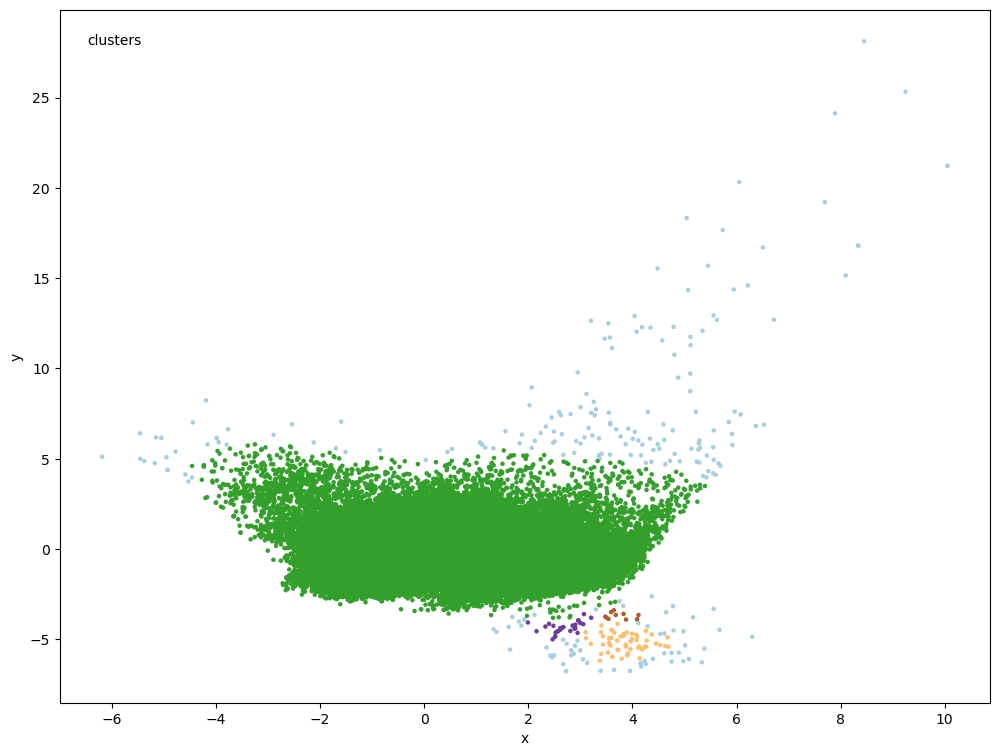

In [23]:
plt.figure(figsize=(12,9))
plt.annotate('clusters', xy=(0.03, 0.95), xycoords='axes fraction')
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=pred, cmap='Paired', s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [26]:
# Cluster evaluation
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

print("Silhouette score: ", silhouette_score(data, pred))
print("Calinski-Harabasz score: ", calinski_harabasz_score(data, pred))
print("Davies-Bouldin score: ", davies_bouldin_score(data, pred))


Silhouette score:  0.5900719169109271
Calinski-Harabasz score:  919.4615087845909
Davies-Bouldin score:  1.0028045333089999
